#### Group Members - Chirag Chandrashekar, Chris Alexander, Viveka Salinamakki


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Importing the Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
seasons_list = [
    '2004-2005',
    '2005-2006',
    '2006-2007',
    '2007-2008',
    '2008-2009',
    '2009-2010',
    '2010-2011',
    '2011-2012',
    '2012-2013',
    '2013-2014',
    '2014-2015',
    '2015-2016',
    '2016-2017',
    '2017-2018',
    '2018-2019',
    '2019-2020',
    '2020-2021',
    '2021-2022',
    '2022-2023',
    '2023-2024'
]

In [5]:
# for season in seasons_list:
pl_data_list = [pd.read_csv(f"..\Data\pl_stats_{season}.csv").assign(Season=season).sort_values(by='Rk', axis=0) for season in seasons_list]

In [9]:
pl_data = pd.concat(pl_data_list, ignore_index=True)
pl_data.isna().sum()[pl_data.isna().sum()>200]

Notes      203
PKatt.1    240
PKA        240
PKsv       240
PKm        240
          ... 
Recov      260
Won        260
Lost.1     260
Won%       260
Last 5     380
Length: 134, dtype: int64


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

In [8]:
def_pressing_stats = ['Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl','Att','Tkl%','Lost','Blocks','Sh','Pass','Int','Tkl+Int','Clr','Err']

In [9]:
data_pressing = pl_data.loc[:,def_pressing_stats]

In [10]:
shot_goal_creation_stats = ['SCA','SCA90','GCA','GCA90']

In [11]:
possession_stats = ['Pts','Poss','90s','Touches','Def Pen','Def 3rd','Mid 3rd','Att 3rd','Att Pen','Live','Att','Succ','Succ%','Tkld','Tkld%','Carries','TotDist','PrgDist','PrgC','1/3','CPA','Mis','Dis','Rec','PrgR']

In [12]:
data_possession = pl_data.loc[:,possession_stats]

In [13]:
data_pressing.columns, data_possession.columns

(Index(['Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl', 'Att', 'Tkl%',
        'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err'],
       dtype='object'),
 Index(['Pts', 'Poss', '90s', 'Touches', 'Def Pen', 'Def 3rd', 'Mid 3rd',
        'Att 3rd', 'Att Pen', 'Live', 'Att', 'Succ', 'Succ%', 'Tkld', 'Tkld%',
        'Carries', 'TotDist', 'PrgDist', 'PrgC', '1/3', 'CPA', 'Mis', 'Dis',
        'Rec', 'PrgR'],
       dtype='object'))

In [14]:
squad_names=pl_data['Squad']
data_pressing_possession = data_pressing.merge(data_possession).set_index(squad_names)

In [15]:
data_pressing_possession_corr = data_pressing_possession.corr()

In [16]:
data_pressing_possession_corr = data_pressing_possession_corr[abs(data_pressing_possession_corr)>0.65]

<Axes: >

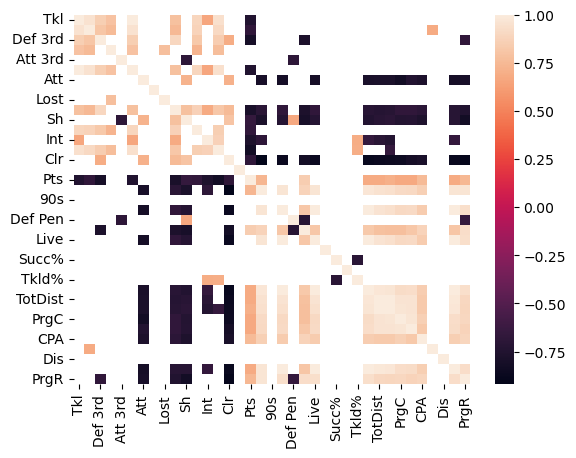

In [17]:
sns.heatmap(data_pressing_possession_corr)

In [18]:
pt_prediction_data = pl_data[data_pressing_possession_corr['Pts'].index]

In [21]:
pt_prediction_data

,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl,Att,Tkl%,Lost,Blocks,...,Carries,TotDist,PrgDist,PrgC,1/3,CPA,Mis,Dis,Rec,PrgR
0,471,272,185,198,88,471,287,45.9,250,339,...,19122,104099,56216,988,754,279,406,298,22992,2054
1,568,343,238,212,118,568,429,48.9,260,362,...,15924,84012,44202,824,583,281,526,378,18101,2024
2,658,400,343,231,84,658,449,50.3,297,496,...,14245,70351,37126,711,515,239,497,293,16447,1578
3,607,360,268,254,85,607,378,47.8,335,448,...,12021,64166,32968,694,493,227,576,363,13803,1599
4,590,370,228,250,112,590,285,43.4,367,350,...,17146,82458,41527,719,569,234,584,413,19921,1974
5,616,340,270,242,104,616,279,47.4,295,392,...,16331,83718,43965,809,547,250,558,324,18991,1828
6,633,338,305,251,77,633,585,48.5,333,438,...,12294,65583,33156,637,434,174,565,371,13587,1227
7,619,353,325,215,79,619,342,47.9,299,428,...,13679,71290,36842,692,465,189,521,356,15864,1436
8,587,337,270,228,89,587,882,42.2,346,456,...,10408,49009,23987,392,299,102,520,335,11203,1121
9,625,350,295,229,101,625,438,51.1,286,455,...,12250,68158,35319,662,472,124,535,379,13847,1316



<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Merging Injury data with pl_data and repeat the same to take relevant correlated columns


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Prediction of Injury using the pressing and possession data

Split the dataset

In [ ]:
# Assuming 'data' includes features and 'injuries' and 'team_rank' as targets
X = pl_data.drop(['injuries', 'team_rank'], axis=1)  # Features
y_injuries = pl_data['injuries']  # Predicting number of injuries
y_rank = pl_data['team_rank']     # Predicting team rank/points

# Split data into training and testing sets
X_train, X_test, y_train_injuries, y_test_injuries = train_test_split(X, y_injuries, test_size=0.2, random_state=42)
X_train, X_test, y_train_rank, y_test_rank = train_test_split(X, y_rank, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

PCA for Dimensionality Reduction

In [ ]:
pca = PCA(n_components=0.95)  # retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Linear Regression

In [ ]:
def train_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"MSE: {mse}, R2: {r2}")

# Linear Regression for injuries
print("Linear Regression for Injuries:")
train_evaluate(LinearRegression(), X_train_pca, y_train_injuries, X_test_pca, y_test_injuries)

# Linear Regression for team rank
print("Linear Regression for Team Rank:")
train_evaluate(LinearRegression(), X_train_pca, y_train_rank, X_test_pca, y_test_rank)


SVM

In [ ]:
# SVM for injuries
print("SVM Regression for Injuries:")
train_evaluate(SVR(), X_train_pca, y_train_injuries, X_test_pca, y_test_injuries)

# SVM for team rank
print("SVM Regression for Team Rank:")
train_evaluate(SVR(), X_train_pca, y_train_rank, X_test_pca, y_test_rank)


Random Forest

In [ ]:
# Random Forest for injuries
print("Random Forest Regression for Injuries:")
train_evaluate(RandomForestRegressor(n_estimators=100, random_state=42), X_train_pca, y_train_injuries, X_test_pca, y_test_injuries)

# Random Forest for team rank
print("Random Forest Regression for Team Rank:")
train_evaluate(RandomForestRegressor(n_estimators=100, random_state=42), X_train_pca, y_train_rank, X_test_pca, y_test_rank)


Decision Tree

In [ ]:
# Decision Tree for injuries
print("Decision Tree Regression for Injuries:")
train_evaluate(DecisionTreeRegressor(random_state=42), X_train_pca


Poisson Regression

In [ ]:
# Poisson Regression for injuries
print("Poisson Regression for Injuries:")
train_evaluate(PoissonRegressor(), X_train_pca, y_train_injuries, X_test_pca, y_test_injuries)

# Poisson Regression for team rank
print("Poisson Regression for Team Rank:")
train_evaluate(PoissonRegressor(), X_train_pca, y_train_rank, X_test_pca, y_test_rank)


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Prediction od expected goals(xG), goals against (xGA), and final expected points of the team at the end of the season